# Description

This notebook is used to request computation of average time-series of a WaPOR data layer for a pixel coordinate using WaPOR API.

# Step 1: Query load

In [1]:
point= [37.95883206252312, 7.89534] #latlon of a point

query_pixeltimeseries={
  "type": "PixelTimeSeries",
  "params": {
    "cube": {
      "code": "L1_PCP_E",
      "workspaceCode": "WAPOR_2",
      "language": "en"
    },
    "dimensions": [
      {
        "code": "DAY",
        "range": "[2009-01-01,2019-01-01)"
      }
    ],
    "measures": [
      "WATER_MM"
    ],
    "point": {
      "crs": "EPSG:4326", #latlon projection              
      "x":point[0],
        "y":point[1]
    }
  }
}

query_pixeltimeseries

{'type': 'PixelTimeSeries',
 'params': {'cube': {'code': 'L1_PCP_E',
   'workspaceCode': 'WAPOR_2',
   'language': 'en'},
  'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
  'measures': ['WATER_MM'],
  'point': {'crs': 'EPSG:4326', 'x': 37.95883206252312, 'y': 7.89534}}}

# Step 2: Send query request

In [2]:
import requests
path_query=r'https://io.apps.fao.org/gismgr/api/v1/query/'

resp_query=requests.post(path_query,json=query_pixeltimeseries)
resp=resp_query.json()
resp

{'requestId': '616d42c1-20c3-422a-b1ba-55cc2dce0e8d',
 'timestamp': 1576161398250,
 'runtime': 97508,
 'status': 200,
 'message': 'OK',
 'response': {'header': ['day', 'value'],
  'items': [['2009-01-01', 0.0],
   ['2009-01-02', 0.0],
   ['2009-01-03', 0.0],
   ['2009-01-04', 0.0],
   ['2009-01-05', 0.0],
   ['2009-01-06', 0.0],
   ['2009-01-07', 0.0],
   ['2009-01-08', 0.0],
   ['2009-01-09', 0.0],
   ['2009-01-10', 0.0],
   ['2009-01-11', 0.0],
   ['2009-01-12', 0.0],
   ['2009-01-13', 0.0],
   ['2009-01-14', 0.0],
   ['2009-01-15', 0.0],
   ['2009-01-16', 0.0],
   ['2009-01-17', 0.0],
   ['2009-01-18', 0.0],
   ['2009-01-19', 0.0],
   ['2009-01-20', 0.0],
   ['2009-01-21', 0.0],
   ['2009-01-22', 0.0],
   ['2009-01-23', 24.0],
   ['2009-01-24', 12.0],
   ['2009-01-25', 24.0],
   ['2009-01-26', 0.0],
   ['2009-01-27', 0.0],
   ['2009-01-28', 0.0],
   ['2009-01-29', 0.0],
   ['2009-01-30', 0.0],
   ['2009-01-31', 0.0],
   ['2009-02-01', 0.0],
   ['2009-02-02', 0.0],
   ['2009-02-03', 

# Step 3: Get request results

In [3]:
import pandas as pd
results=resp['response']
df=pd.DataFrame(results['items'],columns=results['header'])
df

,day,value
0,2009-01-01,0.0
1,2009-01-02,0.0
2,2009-01-03,0.0
3,2009-01-04,0.0
4,2009-01-05,0.0
5,2009-01-06,0.0
6,2009-01-07,0.0
7,2009-01-08,0.0
8,2009-01-09,0.0
9,2009-01-10,0.0


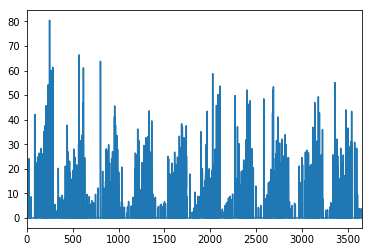

In [5]:
df.value.plot()